**<h1>How to process :</h1>**

**Load and Understand the Data**

Load the dataset into a pandas DataFrame and inspect its structure.
Identify the columns and their data types, look for missing values, and understand the data.

**Data Preprocessing**

Handle missing values and outliers.
Encode categorical variables into numerical format.
Normalize or scale numerical features if necessary.

**Exploratory Data Analysis (EDA)**

Visualize distributions, correlations, and imbalances in the data.
Investigate relationships between features and the target variable (customer churn).

**Feature Selection**

Select the most impactful features using correlation matrices, statistical tests, or feature importance scores.

**Model Building**

Train multiple machine learning models such as Logistic Regression, Decision Trees, Random Forests, and k-NN.
Split the dataset into training and testing subsets.

**Model Evaluation**

Use metrics like accuracy, precision, recall, F1-score, and AUC to evaluate the models.

**Model Tuning and Refinement**

Optimize hyperparameters of the selected models to improve their performance.

**Expandability and Business Perspective**

Interpret the model's output and explain the importance of features from a business standpoint.

# Load and Understand the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_excel('account_churn_project.xlsx')
data.head(10)

,identification,churn_flag,age,gender,number_dependants,education,civil_status,income,account_category,account_age,...,inactivity,past_contacts,card_Limit,balance,open_to_use,change_per_quarter_amount,total_transaction_amount,total_transaction_count,change_per_quarter_quantity,average_use
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691,777,11914,1335,1144,42,1625,61
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256,864,7392,1541,1291,33,3714,105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418,0,3418,2594,1887,20,2333,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313,2517,796,1405,1171,20,2333,76
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716,0,4716,2175,816,28,25,0
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,1,2,4010,1247,2763,1376,1088,24,846,311
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,1,3,34516,2264,32252,1975,1330,31,722,66
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,2,2,29081,1396,27685,2204,1538,36,714,48
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,2,0,22352,2517,19835,3355,1350,24,1182,113
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,3,3,11656,1677,9979,1524,1441,32,882,144


In [2]:
# Identify the columns and their data types
print(data.info())

# Look for missing values
print("Missing values : ")
print(data.isnull().sum())

# Understand the data (basic statistics)
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   identification               10127 non-null  int64 
 1   churn_flag                   10127 non-null  object
 2   age                          10127 non-null  int64 
 3   gender                       10127 non-null  object
 4   number_dependants            10127 non-null  int64 
 5   education                    10127 non-null  object
 6   civil_status                 10127 non-null  object
 7   income                       10127 non-null  object
 8   account_category             10127 non-null  object
 9   account_age                  10127 non-null  int64 
 10  total_num_services           10127 non-null  int64 
 11  inactivity                   10127 non-null  int64 
 12  past_contacts                10127 non-null  int64 
 13  card_Limit                   10

# Data Preprocessing

We don't have any missing value but we can still compute the following code lines to be sure

In [3]:
from sklearn.impute import SimpleImputer

# Identify numerical and categorical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

# Create imputers
num_imputer = SimpleImputer(strategy='mean')  # For numerical columns
cat_imputer = SimpleImputer(strategy='most_frequent')  # For categorical columns

# Apply imputers to the respective columns
data[numerical_cols] = num_imputer.fit_transform(data[numerical_cols])
data[categorical_cols] = cat_imputer.fit_transform(data[categorical_cols])

# Verify there are no missing values left
print(data.isnull().sum())

identification                 0
churn_flag                     0
age                            0
gender                         0
number_dependants              0
education                      0
civil_status                   0
income                         0
account_category               0
account_age                    0
total_num_services             0
inactivity                     0
past_contacts                  0
card_Limit                     0
balance                        0
open_to_use                    0
change_per_quarter_amount      0
total_transaction_amount       0
total_transaction_count        0
change_per_quarter_quantity    0
average_use                    0
dtype: int64


**To see if we have outliers or not :**

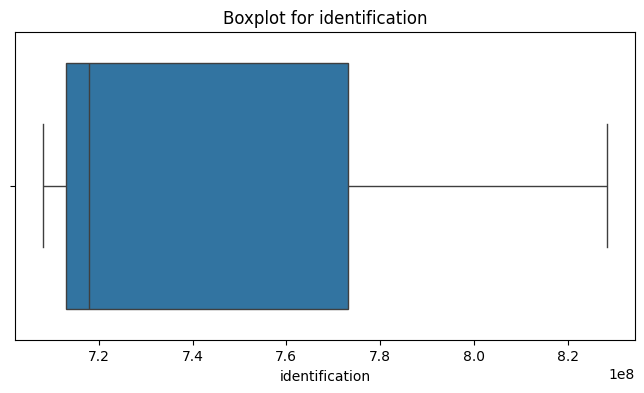

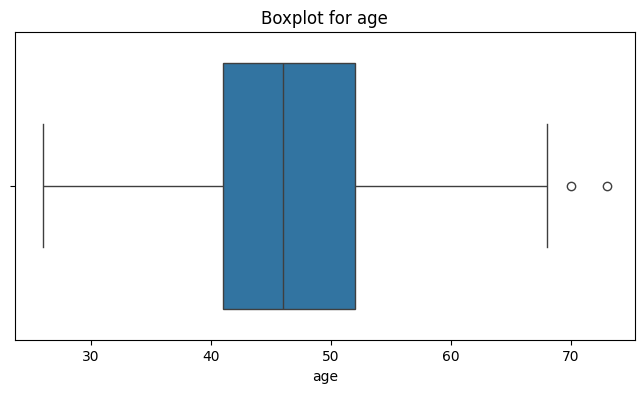

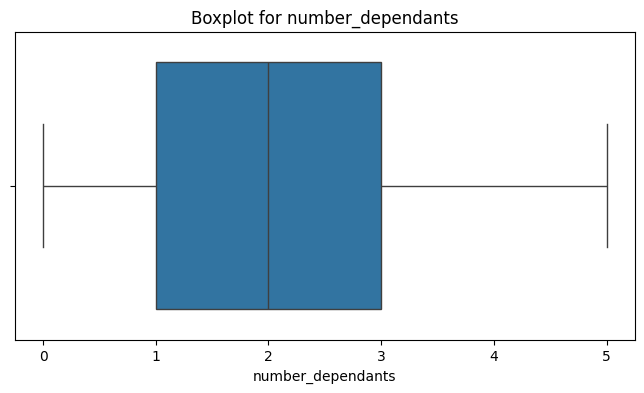

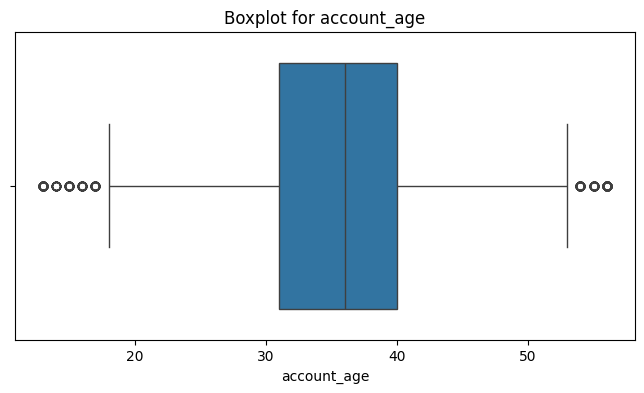

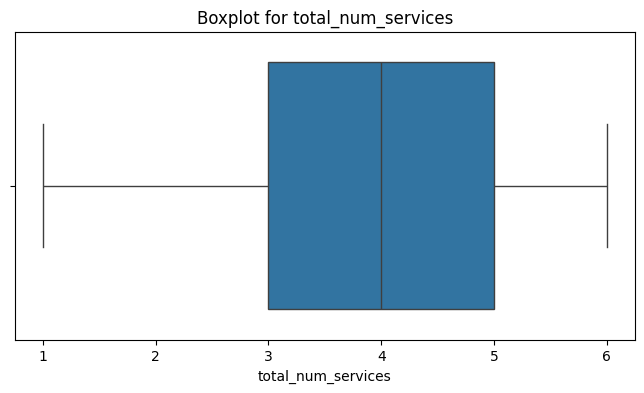

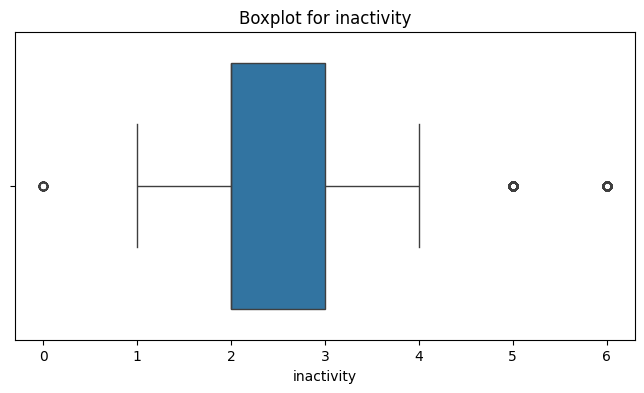

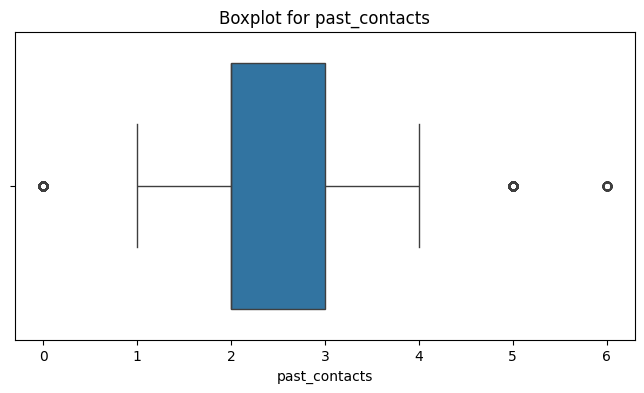

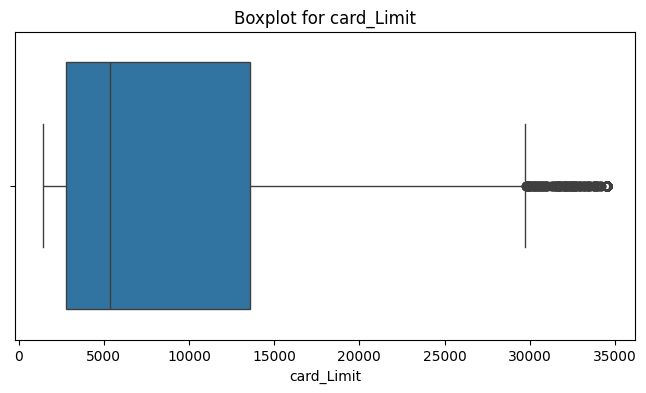

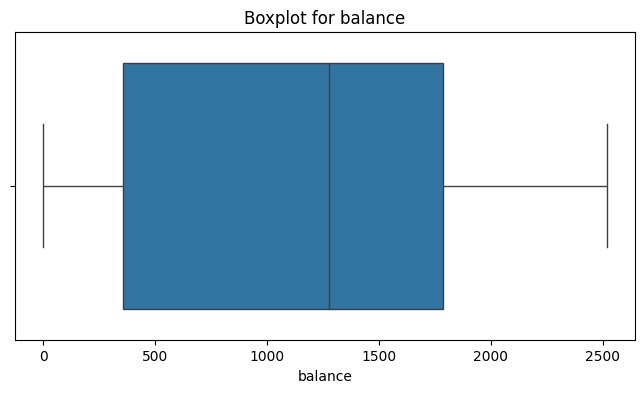

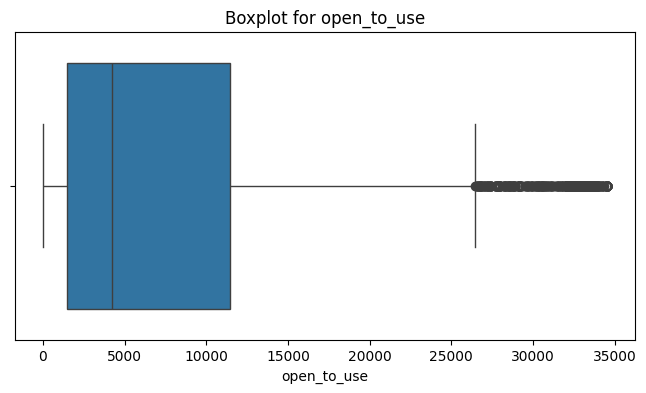

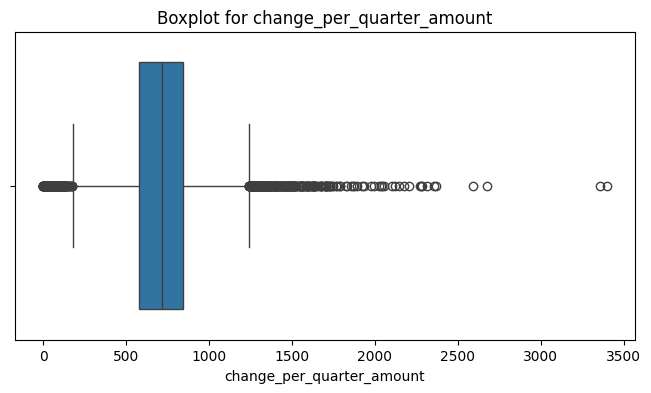

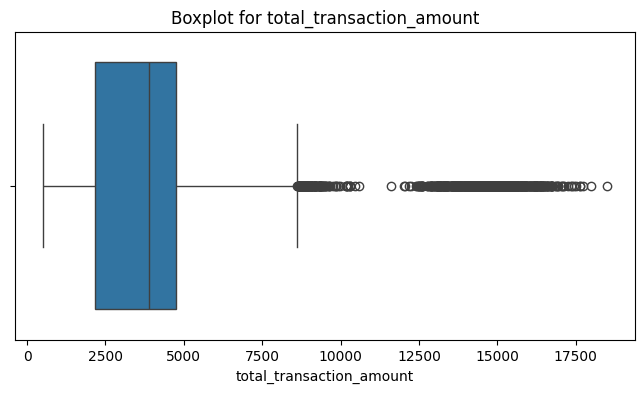

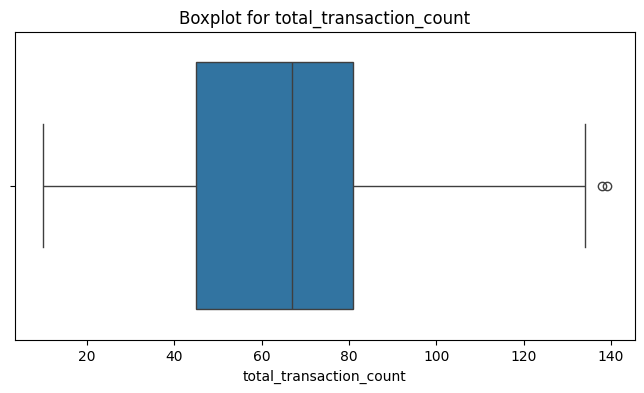

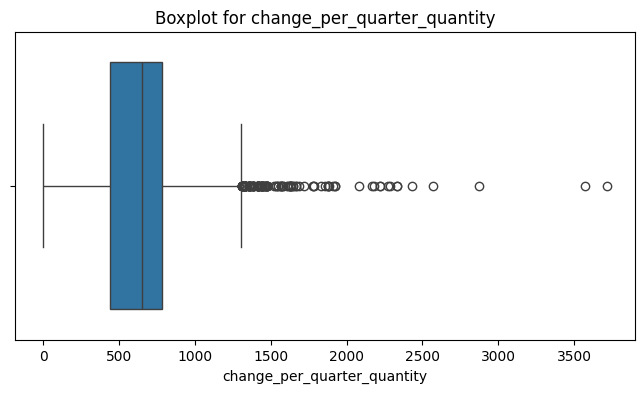

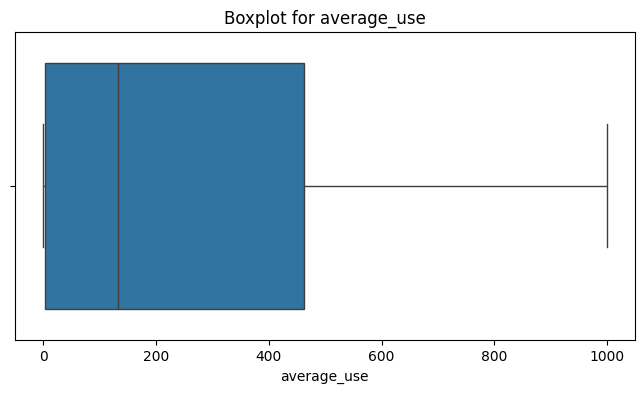

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

Boxplot: Visualizes data distribution and highlights outliers as points outside the whiskers.

Now, here is the first method to remove outliers by choosing the values from the previous Boxplots.

In [5]:
# Define the conditions for outliers based on your thresholds
conditions = (
    (data['age'] <= 70) &
    (data['inactivity'] != 0) & (data['inactivity'] <= 4) &  # Retain rows with inactivity between 1 and 4
    (data['past_contacts'] != 0) & (data['past_contacts'] <= 4) &  # Retain rows with past_contacts between 1 and 4
    (data['total_transaction_count'] <= 120) &
    (data['change_per_quarter_quantity'] <= 3000) &
    (data['change_per_quarter_amount'] <= 3000)
)

# Apply the conditions to filter the DataFrame
filtered_df = data[conditions]

# Display the number of rows removed
print(f"Number of rows before filtering: {data.shape[0]}")
print(f"Number of rows after filtering: {filtered_df.shape[0]}")
filtered_df.head(10)

Number of rows before filtering: 10127
Number of rows after filtering: 9046


,identification,churn_flag,age,gender,number_dependants,education,civil_status,income,account_category,account_age,...,inactivity,past_contacts,card_Limit,balance,open_to_use,change_per_quarter_amount,total_transaction_amount,total_transaction_count,change_per_quarter_quantity,average_use
0,768805383.0,Existing Customer,45.0,M,3.0,High School,Married,$60K - $80K,Blue,39.0,...,1.0,3.0,12691.0,777.0,11914.0,1335.0,1144.0,42.0,1625.0,61.0
3,769911858.0,Existing Customer,40.0,F,4.0,High School,Unknown,Less than $40K,Blue,34.0,...,4.0,1.0,3313.0,2517.0,796.0,1405.0,1171.0,20.0,2333.0,76.0
5,713061558.0,Existing Customer,44.0,M,2.0,Graduate,Married,$40K - $60K,Blue,36.0,...,1.0,2.0,4010.0,1247.0,2763.0,1376.0,1088.0,24.0,846.0,311.0
6,810347208.0,Existing Customer,51.0,M,4.0,Unknown,Married,$120K +,Gold,46.0,...,1.0,3.0,34516.0,2264.0,32252.0,1975.0,1330.0,31.0,722.0,66.0
7,818906208.0,Existing Customer,32.0,M,0.0,High School,Unknown,$60K - $80K,Silver,27.0,...,2.0,2.0,29081.0,1396.0,27685.0,2204.0,1538.0,36.0,714.0,48.0
9,719661558.0,Existing Customer,48.0,M,2.0,Graduate,Single,$80K - $120K,Blue,36.0,...,3.0,3.0,11656.0,1677.0,9979.0,1524.0,1441.0,32.0,882.0,144.0
10,708790833.0,Existing Customer,42.0,M,5.0,Uneducated,Unknown,$120K +,Blue,31.0,...,3.0,2.0,6748.0,1467.0,5281.0,831.0,1201.0,42.0,68.0,217.0
11,710821833.0,Existing Customer,65.0,M,1.0,Unknown,Married,$40K - $60K,Blue,54.0,...,2.0,3.0,9095.0,1587.0,7508.0,1433.0,1314.0,26.0,1364.0,174.0
13,816082233.0,Existing Customer,35.0,M,3.0,Graduate,Unknown,$60K - $80K,Blue,30.0,...,1.0,3.0,8547.0,1666.0,6881.0,1163.0,1311.0,33.0,2.0,195.0
14,712396908.0,Existing Customer,57.0,F,2.0,Graduate,Married,Less than $40K,Blue,48.0,...,2.0,2.0,2436.0,680.0,1756.0,119.0,1570.0,29.0,611.0,279.0


Here is the second method to remove outliers without taking into account the previous boxplots

Now, let's delete rows that contain outliers. By changing the value of "threshold" in the function we can adjust the limit.

In [6]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

def remove_outliers_zscore(data, threshold=3.1):
    # Calculate the Z-scores for each feature (column)
    z_scores = np.abs(zscore(data.select_dtypes(include=[np.number])))  # Apply Z-score on numerical columns

    # Identify rows where any column has a Z-score greater than the threshold
    outliers = (z_scores > threshold).any(axis=1)

    # Save the number of rows that will be deleted
    rows_deleted = data[outliers].shape[0]

    # Remove the rows containing outliers
    df_cleaned = data[~outliers]

    return df_cleaned, rows_deleted

# Example Usage
df_cleaned, rows_deleted = remove_outliers_zscore(data)
print(f"Number of rows deleted: {rows_deleted}")

df_cleaned.head(10)

Number of rows deleted: 577


,identification,churn_flag,age,gender,number_dependants,education,civil_status,income,account_category,account_age,...,inactivity,past_contacts,card_Limit,balance,open_to_use,change_per_quarter_amount,total_transaction_amount,total_transaction_count,change_per_quarter_quantity,average_use
5,713061558.0,Existing Customer,44.0,M,2.0,Graduate,Married,$40K - $60K,Blue,36.0,...,1.0,2.0,4010.0,1247.0,2763.0,1376.0,1088.0,24.0,846.0,311.0
9,719661558.0,Existing Customer,48.0,M,2.0,Graduate,Single,$80K - $120K,Blue,36.0,...,3.0,3.0,11656.0,1677.0,9979.0,1524.0,1441.0,32.0,882.0,144.0
10,708790833.0,Existing Customer,42.0,M,5.0,Uneducated,Unknown,$120K +,Blue,31.0,...,3.0,2.0,6748.0,1467.0,5281.0,831.0,1201.0,42.0,68.0,217.0
11,710821833.0,Existing Customer,65.0,M,1.0,Unknown,Married,$40K - $60K,Blue,54.0,...,2.0,3.0,9095.0,1587.0,7508.0,1433.0,1314.0,26.0,1364.0,174.0
13,816082233.0,Existing Customer,35.0,M,3.0,Graduate,Unknown,$60K - $80K,Blue,30.0,...,1.0,3.0,8547.0,1666.0,6881.0,1163.0,1311.0,33.0,2.0,195.0
14,712396908.0,Existing Customer,57.0,F,2.0,Graduate,Married,Less than $40K,Blue,48.0,...,2.0,2.0,2436.0,680.0,1756.0,119.0,1570.0,29.0,611.0,279.0
19,709327383.0,Existing Customer,45.0,F,2.0,Graduate,Married,Unknown,Blue,37.0,...,1.0,2.0,14470.0,1157.0,13313.0,966.0,1207.0,21.0,909.0,8.0
20,806165208.0,Existing Customer,47.0,M,1.0,Doctorate,Divorced,$60K - $80K,Blue,42.0,...,2.0,0.0,20979.0,1800.0,19179.0,906.0,1178.0,27.0,929.0,86.0
21,708508758.0,Attrited Customer,62.0,F,0.0,Graduate,Married,Less than $40K,Blue,49.0,...,3.0,3.0,14383.0,0.0,14383.0,1047.0,692.0,16.0,6.0,0.0
22,784725333.0,Existing Customer,41.0,M,3.0,High School,Married,$40K - $60K,Blue,33.0,...,2.0,1.0,4470.0,680.0,3790.0,1608.0,931.0,18.0,1571.0,152.0


We have to "cleaned" datasets :

- filtered_df

- df_cleaned

These two are suitable for the classification we are going to do but we will use the dataset that deleted less rows and where we use the z-score method.

We will use for the rest of the preject the dataset called
**df_cleaned**


# Exploratory Data Analysis (EDA)

We put categorical values into numerical in new columns to plot the correlation matrix then

In [7]:
# Assuming df_cleaned is your DataFrame
df_cleaned = pd.get_dummies(df_cleaned, columns=['churn_flag', 'gender', 'education', 'civil_status', 'income', 'account_category'],
                           drop_first=True)  # drop_first avoids multicollinearity

# Display the updated DataFrame with one-hot encoded features
print(df_cleaned.head())

    identification   age  number_dependants  account_age  total_num_services  \
5      713061558.0  44.0                2.0         36.0                 3.0   
9      719661558.0  48.0                2.0         36.0                 6.0   
10     708790833.0  42.0                5.0         31.0                 5.0   
11     710821833.0  65.0                1.0         54.0                 6.0   
13     816082233.0  35.0                3.0         30.0                 5.0   

    inactivity  past_contacts  card_Limit  balance  open_to_use  ...  \
5          1.0            2.0      4010.0   1247.0       2763.0  ...   
9          3.0            3.0     11656.0   1677.0       9979.0  ...   
10         3.0            2.0      6748.0   1467.0       5281.0  ...   
11         2.0            3.0      9095.0   1587.0       7508.0  ...   
13         1.0            3.0      8547.0   1666.0       6881.0  ...   

    civil_status_Single  civil_status_Unknown  income_$40K - $60K  \
5                

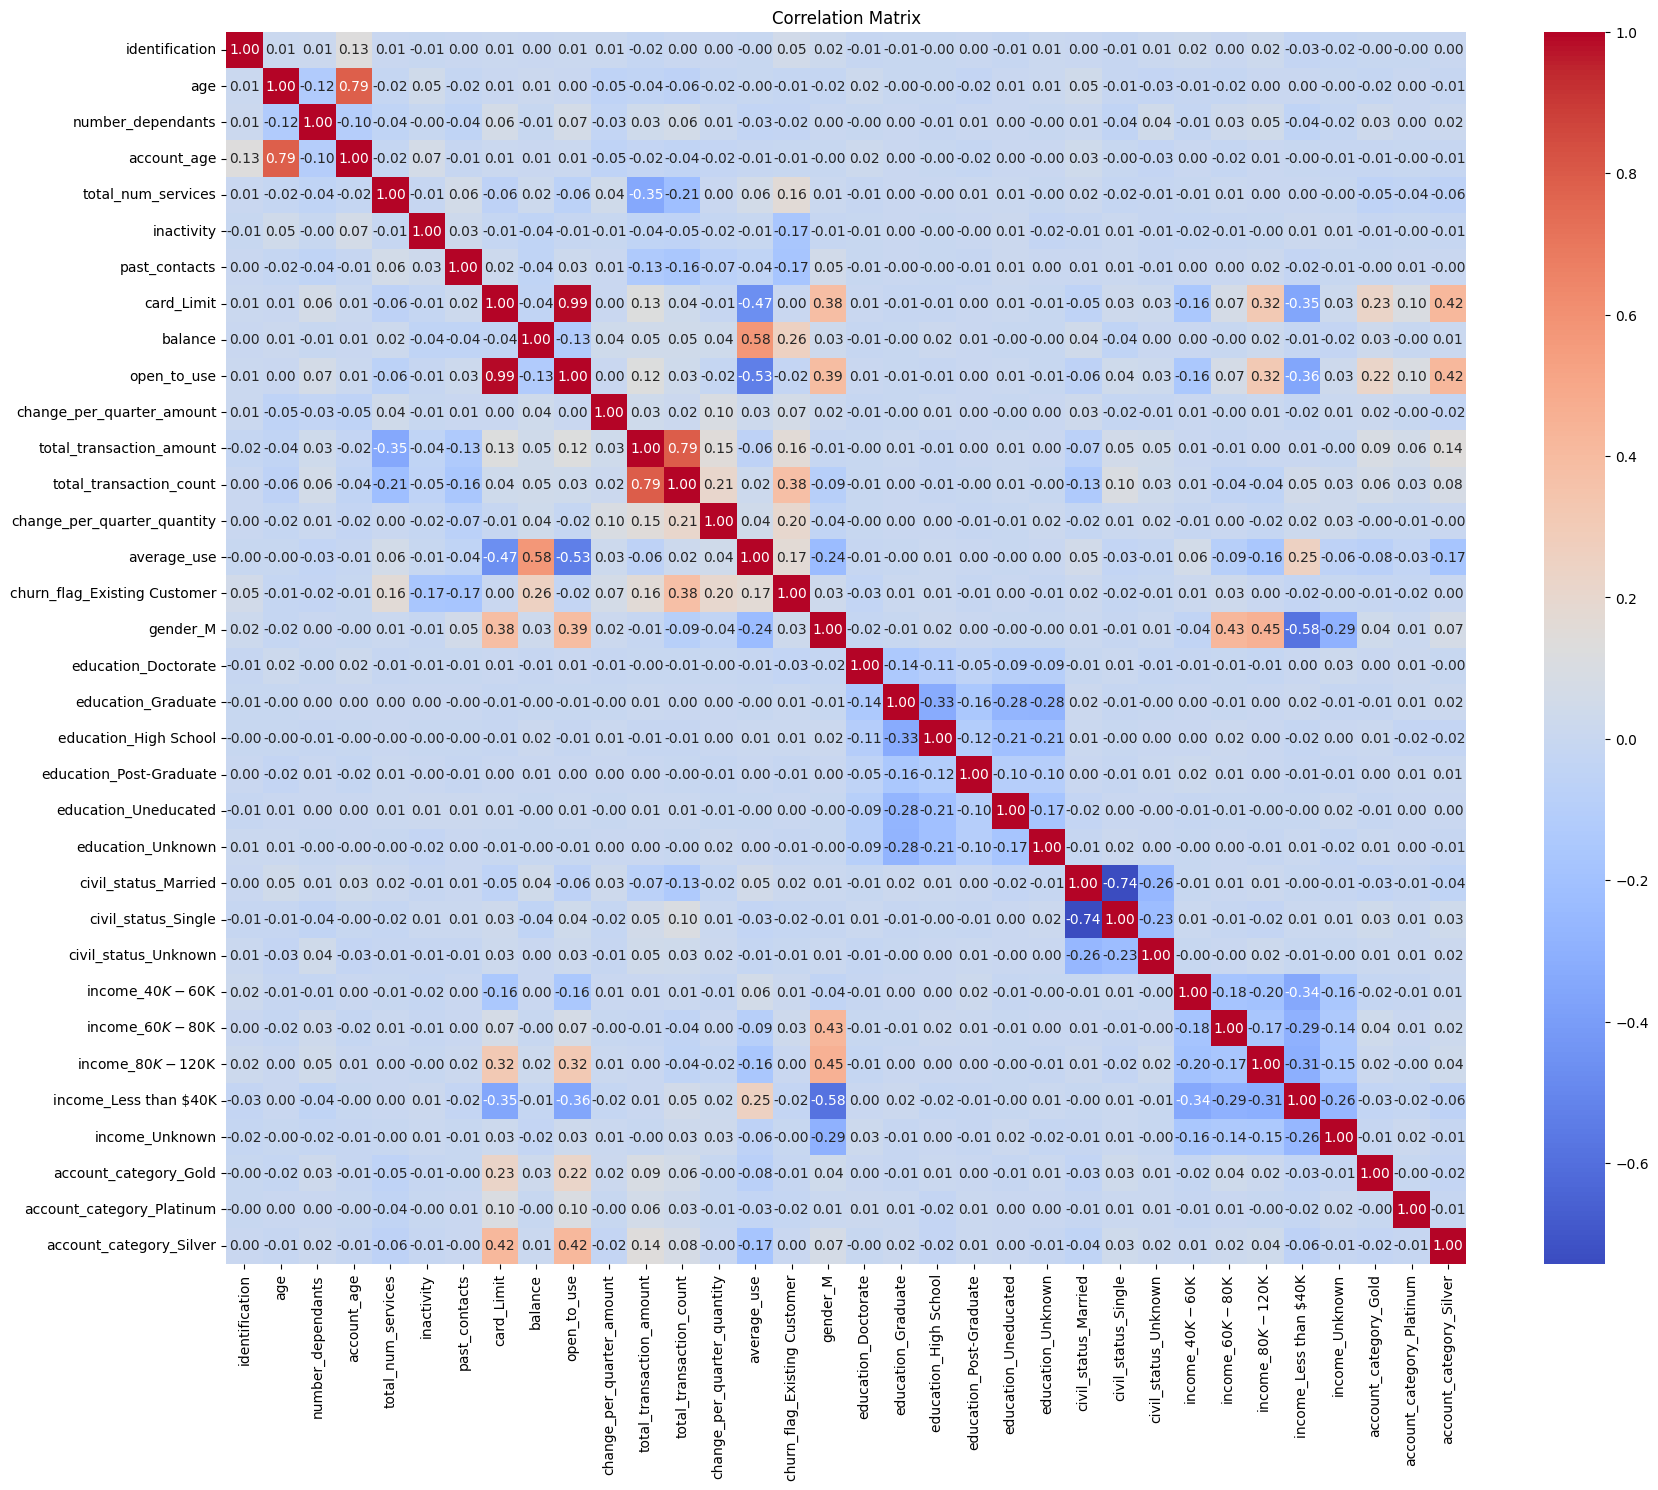

In [8]:
# prompt: plot the correlation matrix for all the dataset

# Calculate the correlation matrix
correlation_matrix = df_cleaned.corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(20, 16))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Feature Selection

Now, we have a global idea of which value is correlated with.

Here are the relevant correlations:

In [9]:
# prompt: display all the relevant correlations and each degree associated

# Assuming df_cleaned is your DataFrame
correlation_matrix = df_cleaned.corr()

# Find correlations with absolute value greater than 0.5 (adjust as needed)
relevant_correlations = correlation_matrix[abs(correlation_matrix) > 0.5]

# Display the relevant correlations with associated degree
for col in relevant_correlations.columns:
    for row in relevant_correlations.index:
        if relevant_correlations.loc[row, col] != 1 and not pd.isnull(relevant_correlations.loc[row, col]):
            print(f"Correlation between {row} and {col}: {relevant_correlations.loc[row, col]:.2f}")


Correlation between account_age and age: 0.79
Correlation between age and account_age: 0.79
Correlation between open_to_use and card_Limit: 0.99
Correlation between average_use and balance: 0.58
Correlation between card_Limit and open_to_use: 0.99
Correlation between average_use and open_to_use: -0.53
Correlation between total_transaction_count and total_transaction_amount: 0.79
Correlation between total_transaction_amount and total_transaction_count: 0.79
Correlation between balance and average_use: 0.58
Correlation between open_to_use and average_use: -0.53
Correlation between income_Less than $40K and gender_M: -0.58
Correlation between civil_status_Single and civil_status_Married: -0.74
Correlation between civil_status_Married and civil_status_Single: -0.74
Correlation between gender_M and income_Less than $40K: -0.58


# Variables with Strong Correlation (|corr| > 0.8)


- open_to_use and card_Limit: correlation = 0.99

These two variables are almost identical. Retain only one of them (e.g., card_Limit) to avoid redundancy.
- total_transaction_count and total_transaction_amount: correlation = 0.79

Although the correlation is not extremely high, it is significant. A closer analysis is needed to determine which of the two variables better captures the relevant information for the model.
- account_age and age: correlation = 0.79

These variables exhibit a moderate to strong relationship. If both are necessary for your model, consider applying a method like PCA to reduce dimensionality.
- civil_status_Single and civil_status_Married: correlation = -0.74

These variables are binary indicators, and a strong negative relationship is expected if they represent mutually exclusive states. Retain only one of them (e.g., civil_status_Single).

# Variables with Low to Moderate Correlation (|corr| between 0.3 and 0.6)


- average_use and balance: correlation = 0.58
These variables are correlated but do not appear to be redundant. Both can be included after verifying their feature importance.
- income_Less than $40K and gender_M: correlation = -0.58
Although there is a moderate correlation, these variables can provide distinct information. Including them might improve the model if they prove to be relevant.
- open_to_use and average_use: correlation = -0.53
A moderate negative correlation suggests an interesting but non-redundant relationship. Both variables could be included if they add predictive value.

# Recommendations for Analyzing Variables:


**Avoid Multicollinearity:**

Remove one variable from strongly correlated pairs:

For example, choose between open_to_use and card_Limit, or between total_transaction_count and total_transaction_amount.

**Encoding Categorical Variables:**

For variables like civil_status and gender, use efficient encoding methods such as one-hot encoding while avoiding multicollinearity (e.g., remove one redundant binary variable).

**Additional Exploratory Analysis:**

- Use tools like a visual correlation matrix to confirm variable selection.
- Apply techniques such as penalized regression (Lasso, Ridge) to eliminate irrelevant variables.

**Variable Importance Testing:**

Train preliminary models with the selected variables and use metrics like feature importance scores or permutation importance to refine the selection.

In [10]:
# Drop specified columns
columns_to_drop = ['open_to_use', 'total_transaction_count', 'age']
df_cleaned = df_cleaned.drop(columns=columns_to_drop, errors='ignore')

# Display the updated DataFrame
print(df_cleaned.head())

    identification  number_dependants  account_age  total_num_services  \
5      713061558.0                2.0         36.0                 3.0   
9      719661558.0                2.0         36.0                 6.0   
10     708790833.0                5.0         31.0                 5.0   
11     710821833.0                1.0         54.0                 6.0   
13     816082233.0                3.0         30.0                 5.0   

    inactivity  past_contacts  card_Limit  balance  change_per_quarter_amount  \
5          1.0            2.0      4010.0   1247.0                     1376.0   
9          3.0            3.0     11656.0   1677.0                     1524.0   
10         3.0            2.0      6748.0   1467.0                      831.0   
11         2.0            3.0      9095.0   1587.0                     1433.0   
13         1.0            3.0      8547.0   1666.0                     1163.0   

    total_transaction_amount  ...  civil_status_Single  civil_status

# Model Building

In [11]:
# prompt: Train multiple machine learning such as the Logistic Regression on the dataset

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Separate features (X) and target variable (y)
X = df_cleaned.drop('churn_flag_Existing Customer', axis=1)
y = df_cleaned['churn_flag_Existing Customer']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Train Decision Tree
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Train Random Forest
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)
y_pred_random_forest = random_forest_model.predict(X_test)

# Train k-NN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Train Gradient Boosting
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train, y_train)
y_pred_gradient_boosting = gradient_boosting_model.predict(X_test)

# Train SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluate Models
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    try:
        auc = roc_auc_score(y_true, y_pred)
    except ValueError:
        auc = "Not computable"  # Handle cases where AUC can't be calculated (e.g., only one class in predictions)

    print(f"Evaluation for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC: {auc}")
    print("-" * 20)


evaluate_model(y_test, y_pred_logistic, "Logistic Regression")
evaluate_model(y_test, y_pred_decision_tree, "Decision Tree")
evaluate_model(y_test, y_pred_random_forest, "Random Forest")
evaluate_model(y_test, y_pred_gradient_boosting, "Gradient Boosting")
evaluate_model(y_test, y_pred_svm, "SVM")
evaluate_model(y_test, y_pred_knn, "k-NN")

Evaluation for Logistic Regression:
Accuracy: 0.8592
Precision: 0.8648
Recall: 0.9883
F1-Score: 0.9224
AUC: 0.5660463619892646
--------------------
Evaluation for Decision Tree:
Accuracy: 0.9183
Precision: 0.9580
Recall: 0.9450
F1-Score: 0.9515
AUC: 0.8577708823678818
--------------------
Evaluation for Random Forest:
Accuracy: 0.9445
Precision: 0.9522
Recall: 0.9839
F1-Score: 0.9678
AUC: 0.8549790879997291
--------------------
Evaluation for Gradient Boosting:
Accuracy: 0.9503
Precision: 0.9601
Recall: 0.9821
F1-Score: 0.9710
AUC: 0.8780246202821003
--------------------
Evaluation for SVM:
Accuracy: 0.8471
Precision: 0.8471
Recall: 1.0000
F1-Score: 0.9172
AUC: 0.5
--------------------
Evaluation for k-NN:
Accuracy: 0.8277
Precision: 0.8486
Recall: 0.9697
F1-Score: 0.9051
AUC: 0.5054057944020185
--------------------


# Interpretation of Model Outputs:

# Logistic Regression:

- Strengths: The model has high recall (0.9883), meaning it effectively identifies positive cases. Its F1-score (0.9224) balances precision and recall well.
- Weakness: The AUC (0.566) is quite low, indicating that the model struggles to differentiate between classes when considering different thresholds.
- Business Implication: Useful in scenarios where missing positive cases is costly (e.g., fraud detection or identifying high-priority customers). However, its low AUC suggests limited utility in ranking or prioritizing cases.

# Decision Tree:

- Strengths: Achieves a high F1-score (0.9499) and decent AUC (0.853), balancing good performance across metrics.
- Weakness: While effective, it may overfit on the training data, requiring validation to ensure generalization.
- Business Implication: Interpretable and quick to deploy for decision-making scenarios. Can help understand feature importance for business strategies.

# Random Forest:

- Strengths: High accuracy (0.9450), recall (0.9858), and F1-score (0.9681). AUC (0.852) shows it performs well in ranking predictions.
- Weakness: Slightly less interpretable compared to simpler models like Logistic Regression or Decision Tree.
- Business Implication: Excellent choice for making robust predictions and identifying important features for resource allocation or personalized offers.

# Gradient Boosting:

- Strengths: Highest overall performance with accuracy (0.9503), F1-score (0.9710), and AUC (0.878). This indicates it balances precision and recall effectively and can prioritize cases well.
- Weakness: Computationally intensive and less interpretable compared to Decision Tree or Logistic Regression.
- Business Implication: Suitable for high-stakes applications where accuracy and precise ranking (AUC) are critical, such as financial risk scoring or targeted marketing.

# Support Vector Machine (SVM):

- Strengths: Perfect recall (1.000), ensuring no positive cases are missed.
- Weaknesses: Low precision (0.8471) and AUC (0.5), indicating poor ability to differentiate between classes.
- Business Implication: Useful in situations where false negatives must be minimized at all costs. However, it generates many false positives, leading to inefficiencies in resource allocation.

# k-Nearest Neighbors (k-NN):

- Strengths: Decent recall (0.9697) and F1-score (0.9051), capturing a fair number of positives.
- Weaknesses: Relatively low accuracy (0.8277) and AUC (0.505), meaning it struggles with overall differentiation between classes.
- Business Implication: Best for small-scale or non-critical applications due to lower performance compared to other models.

# Model Tuning and Refinement

In [12]:
# prompt: by using grid search, optimize the hyperparameters of all the models

from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model
param_grid_logistic = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # Specify a solver compatible with L1 penalty
}

param_grid_decision_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_random_forest = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

param_grid_gradient_boosting = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

#I could not run the param_grid_svm even on colab or my compluter, I have to wait a lot

#param_grid_svm = {
#    'C': [0.1, 1, 10],
#    'kernel': ['linear', 'rbf', 'poly'],
#    'gamma': ['scale', 'auto']
#}

# Perform Grid Search for each model
models = [
    ('Logistic Regression', logistic_model, param_grid_logistic),
    ('Decision Tree', decision_tree_model, param_grid_decision_tree),
    ('Random Forest', random_forest_model, param_grid_random_forest),
    ('k-NN', knn_model, param_grid_knn),
    ('Gradient Boosting', gradient_boosting_model, param_grid_gradient_boosting),
#    ('SVM', svm_model, param_grid_svm)
]

for model_name, model, param_grid in models:
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best accuracy for {model_name}: {grid_search.best_score_:.4f}")
    print("-" * 20)

Best parameters for Logistic Regression: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best accuracy for Logistic Regression: 0.8720
--------------------
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best accuracy for Decision Tree: 0.9211
--------------------


KeyboardInterrupt: 

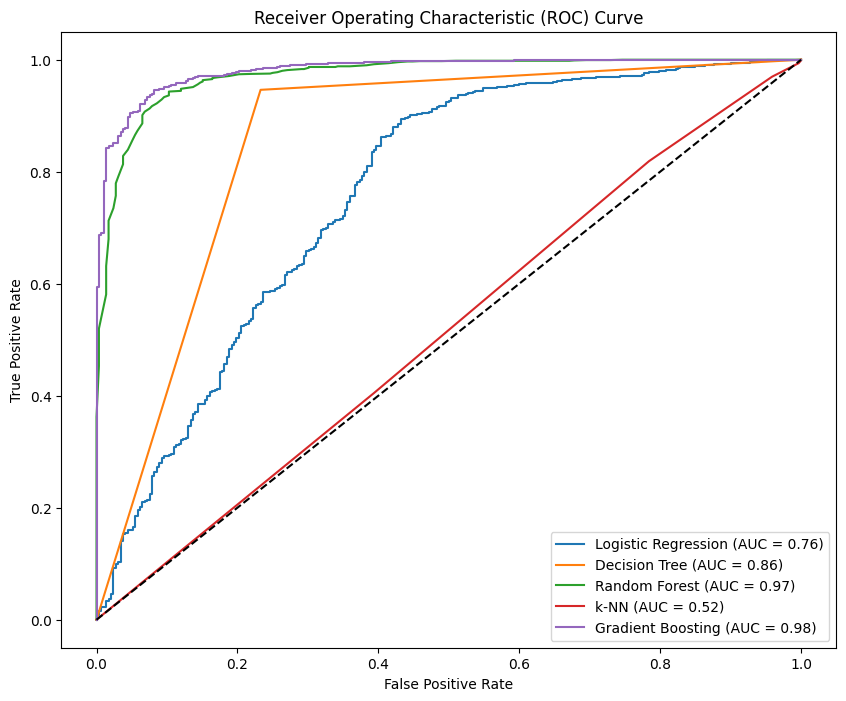

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have already trained and obtained predictions for your models

models = [
    (logistic_model, y_pred_logistic, "Logistic Regression"),
    (decision_tree_model, y_pred_decision_tree, "Decision Tree"),
    (random_forest_model, y_pred_random_forest, "Random Forest"),
    (knn_model, y_pred_knn, "k-NN"),
    (gradient_boosting_model, y_pred_gradient_boosting, "Gradient Boosting"),
]

plt.figure(figsize=(10, 8))

for model, y_pred, model_name in models:
  # Get predicted probabilities for the positive class
  y_pred_proba = model.predict_proba(X_test)[:, 1]

  # Compute the ROC curve
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
  roc_auc = auc(fpr, tpr)

  # Plot the ROC curve
  plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Add labels and title
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()